# 과제1-타이타닉 데이터 분석
### 최종: "Survived" 변수를 분류하는 머신러닝 모형 만들기
2022100837 김다영

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [2]:
train = pd.read_csv("data/train.csv", index_col="PassengerId")
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 데이터 분석
1. 성별에 따른 생존율
2. 객실 등급에 따른 생존율
3. 나이에 따른 생존율
4. 형제, 배우자 수에 따른 생존율
5. 결혼 여부에 따른 생존율 -> Mr/ Miss, Mrs, Ms
6. 탑승지에 따른 생존율 -> 잘사는도시/못사는도시? -> 객실 등급 확인

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

1. 생존율: survived의 mean 평균값-> 전체의 38%가 생존, 나머지 62%는 사망
2. 승객의 남녀 성비: frequency값-> 891명 중 577명이 male, 나머지는 female
3. 객실 등급 비율: 전체 승객 891명 중 491명이 3등급, 216명이 1등급, 184명이 2등급 탑승
4. 주요 연령대: 20살(25%) ~ 38살(75%)
5. 가족 동행: 70% 이상의 승객이 형제자매, 배우자, 부모, 자녀의 동행없이 혼자 탑승

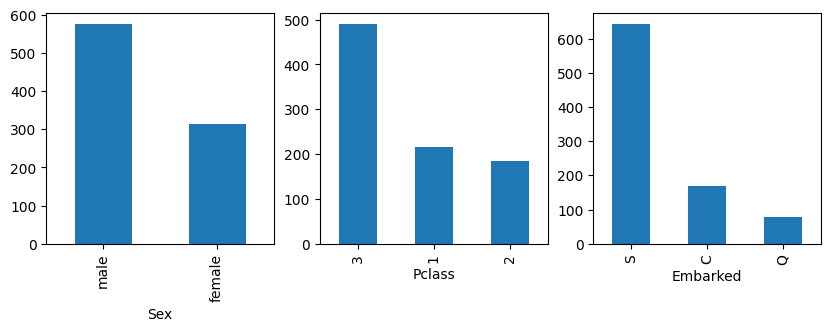

In [7]:
# 전체 승객 중 성별/객실등급/선착장 수 그래프
fig, axes = plt.subplots(1, 3, dpi=100, figsize=(10,3))
train["Sex"].value_counts().plot(kind="bar", ax=axes.flat[0])
train["Pclass"].value_counts().plot(kind="bar", ax=axes.flat[1])
train["Embarked"].value_counts().plot(kind="bar", ax=axes.flat[2])
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_12040\593263878.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


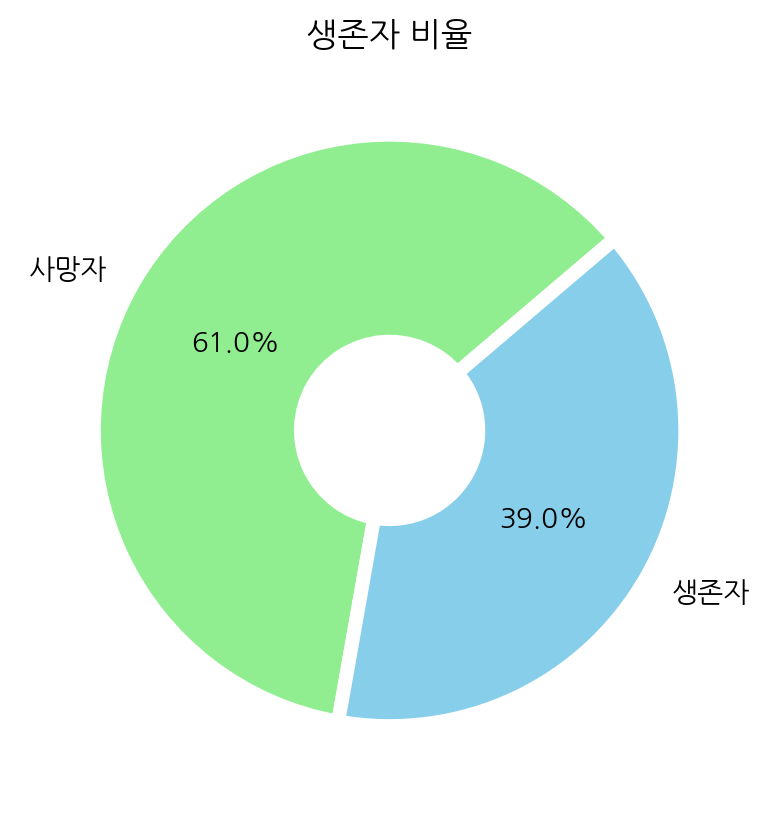

In [8]:
# 그래프를 선명하게 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 한글 폰트가 깨지지 않도록 설정
plt.rc("font",family="NanumGothic")

# matplotlib에 pie 그래프를 활용하여 표현
ratio = [61, 39]
labels = ['사망자', '생존자']
colors = ['lightgreen', 'skyblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.title('생존자 비율')
plt.show()

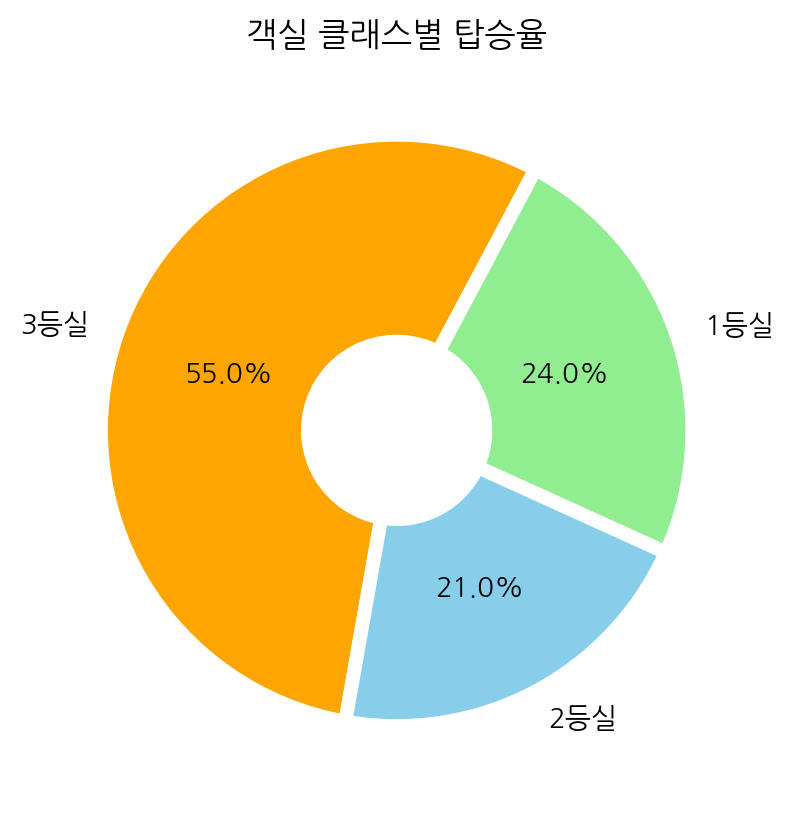

In [9]:
ratio = [55, 24, 21]
labels = ['3등실', '1등실', '2등실']
colors = ['orange', 'lightgreen', 'skyblue']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.title('객실 클래스별 탑승율')
plt.show()

In [10]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [11]:
# 성별에 따른 생존율: 두 데이터만 가져와 성별을 기준으로 묶어 평균
train[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


##### 성별에 따른 생존율: 남,여 따로 계산하는 방법
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)


In [12]:
# 객실 등급별 생존율
train[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<Axes: xlabel='Survived', ylabel='count'>

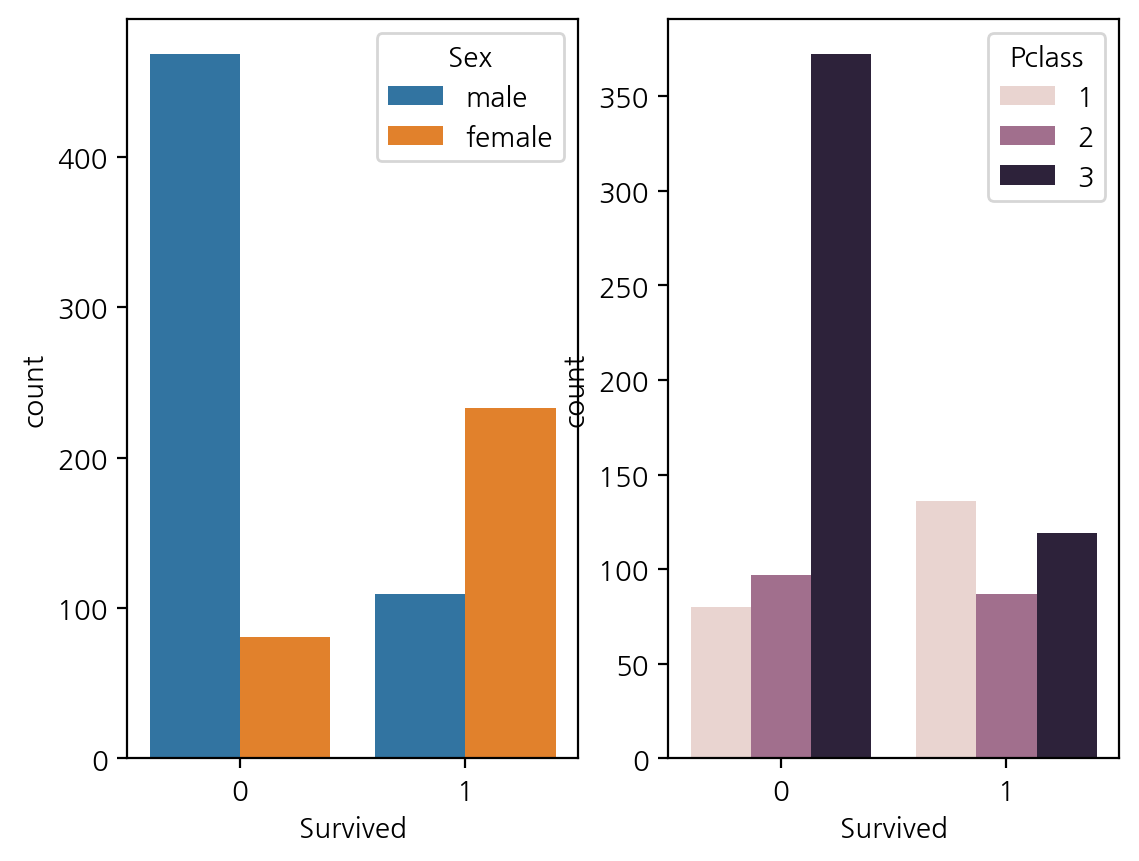

In [13]:
fig, ax = plt.subplots(ncols=2)
# 성별에 따른 생존자 수 막대그래프 시각화
sns.countplot(x='Survived', hue='Sex', data=train, ax=ax[0])
#객실 등급에 따른 생존자 수 막대 그래프 시각화
sns.countplot(x='Survived', hue='Pclass', data=train, ax=ax[1])

In [14]:
# 원형그래프로 시각화
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    
    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + ' 비율')
    plt.show()
    
    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index) + '의 비율')
    
    plt.show()

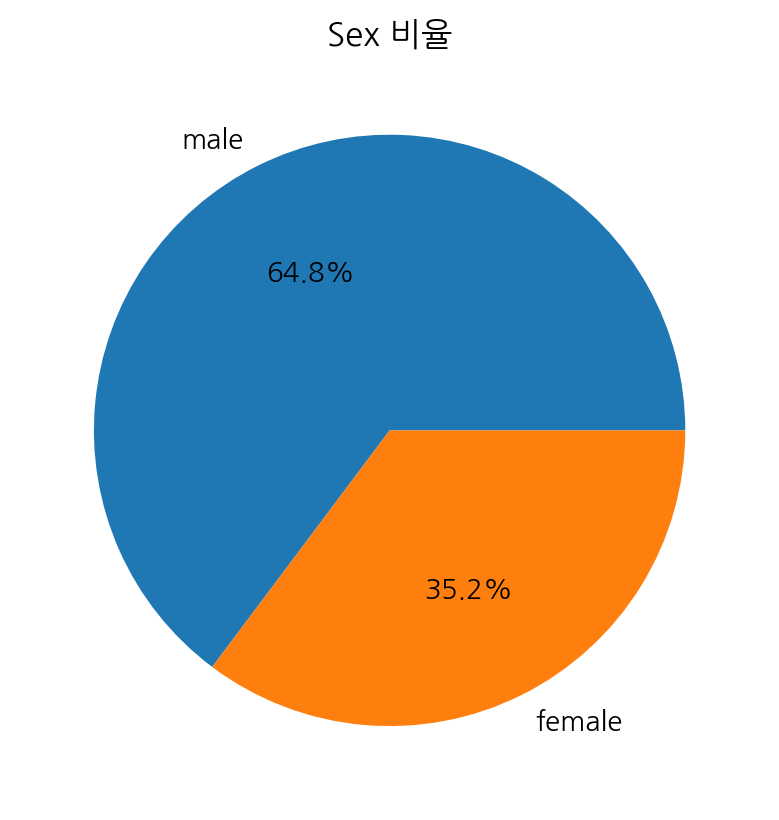

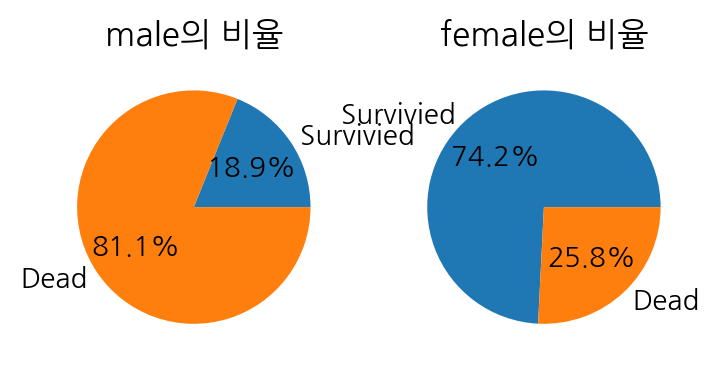

In [15]:
pie_chart('Sex')

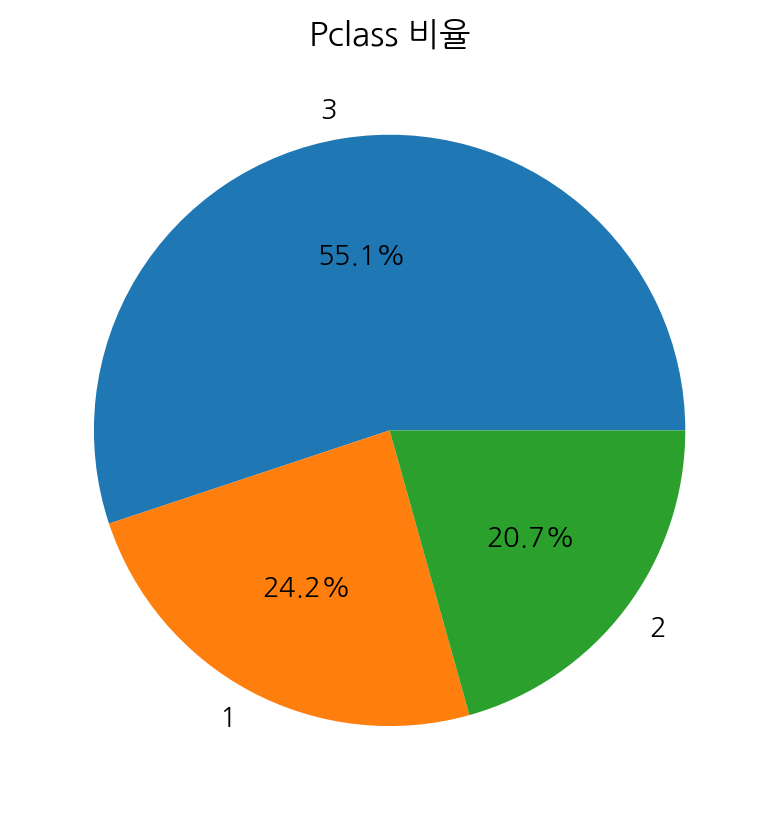

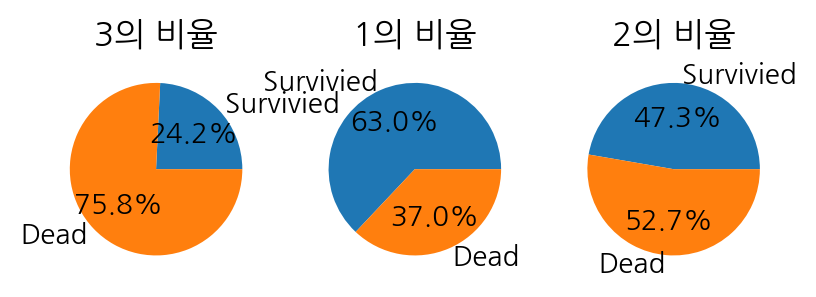

In [16]:
pie_chart('Pclass')

In [17]:
# 연령대 구분을 위한 컬럼 생성
train['Agerange'] = pd.cut(train.Age, bins = [0,13,20,30,40,50,60,70,80], labels = ['유아', '청소년', '20대', '30대', '40대', '50대', '60대', '70대'])
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agerange
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20대
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30대
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20대
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30대
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30대


In [18]:
# 연령대와 생존자 간의 연관성
train[['Agerange', 'Survived']].groupby('Agerange', as_index=False).mean()

C:\Users\User\AppData\Local\Temp\ipykernel_12040\3443067599.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train[['Agerange', 'Survived']].groupby('Agerange', as_index=False).mean()


,Agerange,Survived
0,유아,0.591549
1,청소년,0.370370
2,20대,0.365217
3,30대,0.445161
4,40대,0.383721
5,50대,0.404762
6,60대,0.235294
7,70대,0.200000


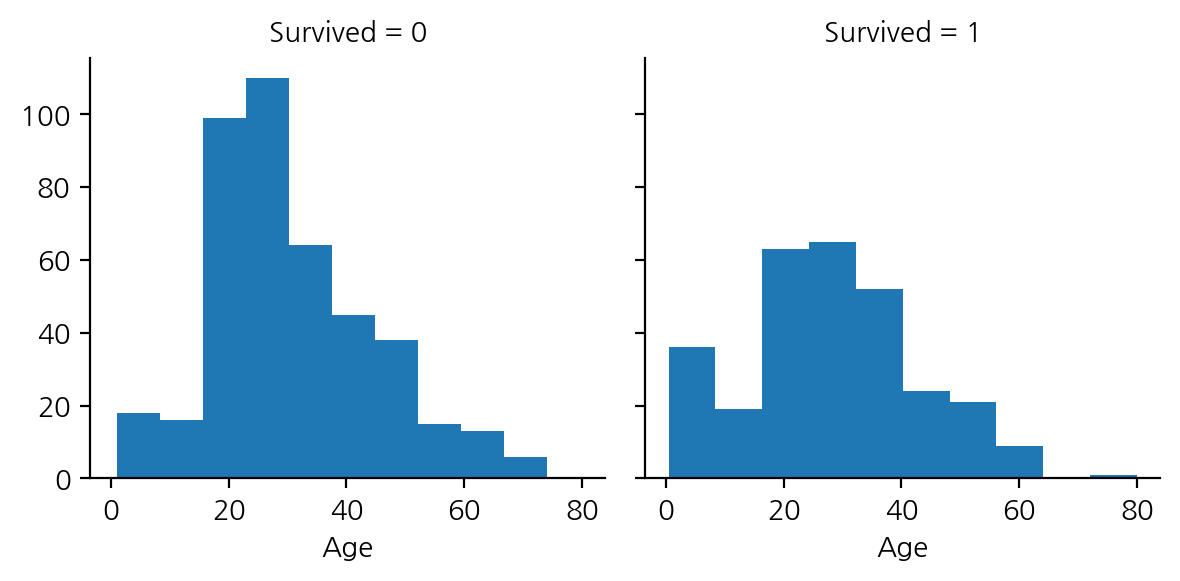

In [19]:
# 연령대에 따른 생존자 시각화
grid = sns.FacetGrid(data=train, col='Survived')
grid.map(plt.hist, 'Age', bins=10)

In [20]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

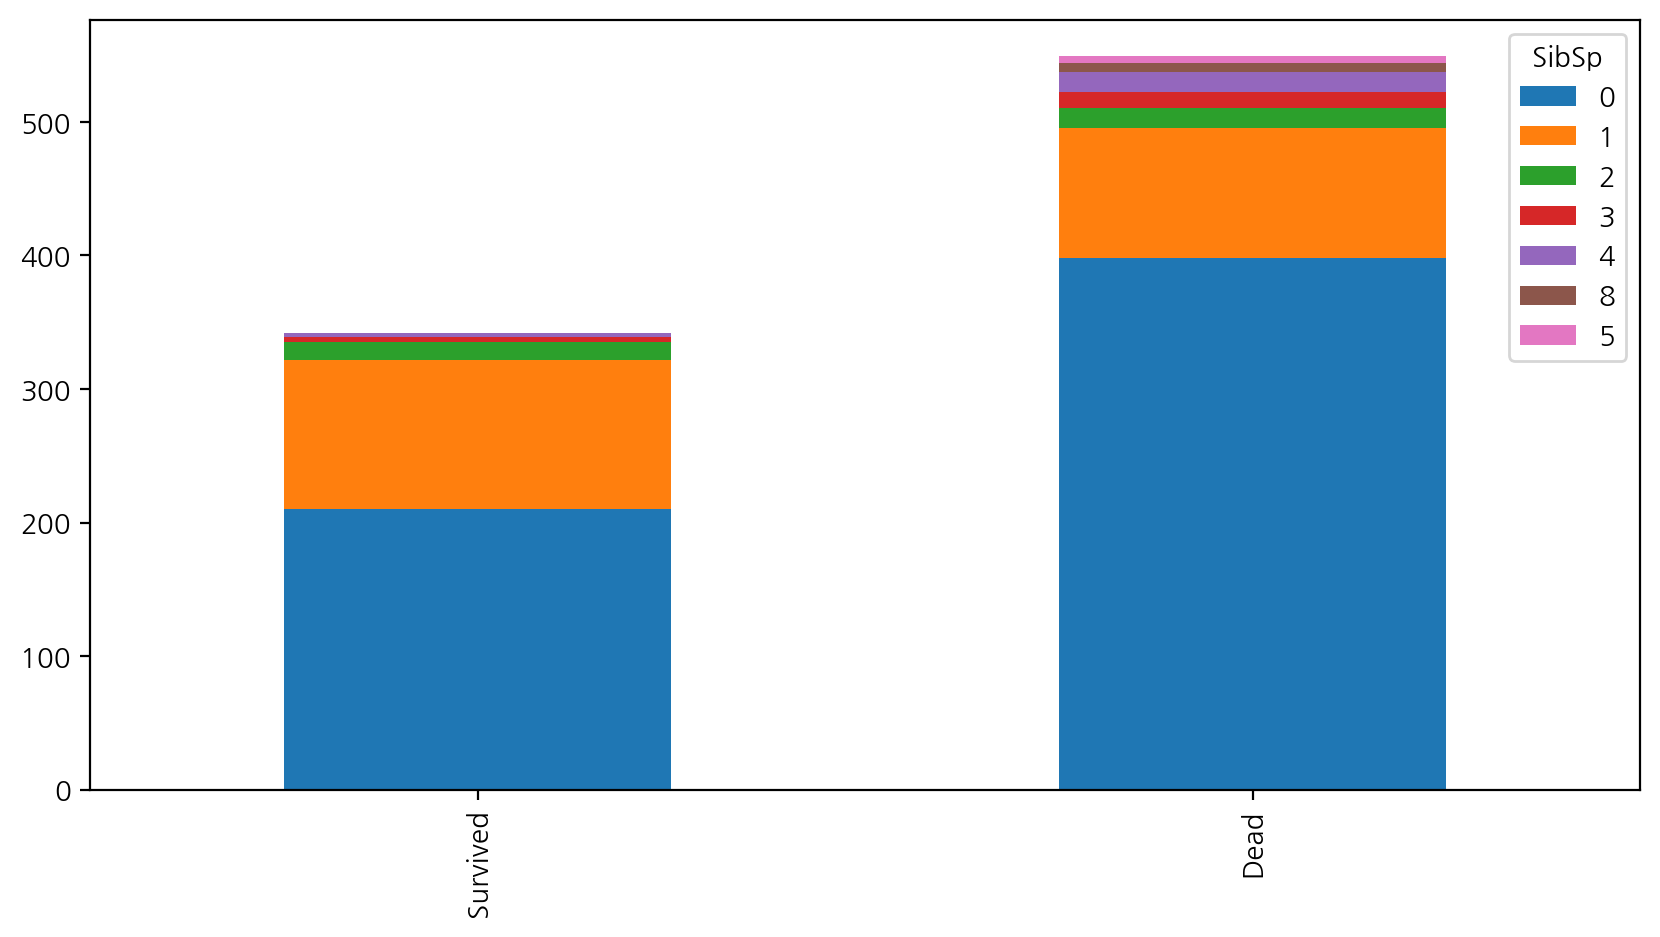

In [21]:
# 동행한 형제자매수에 따른 생존자 시각화
bar_chart("SibSp")

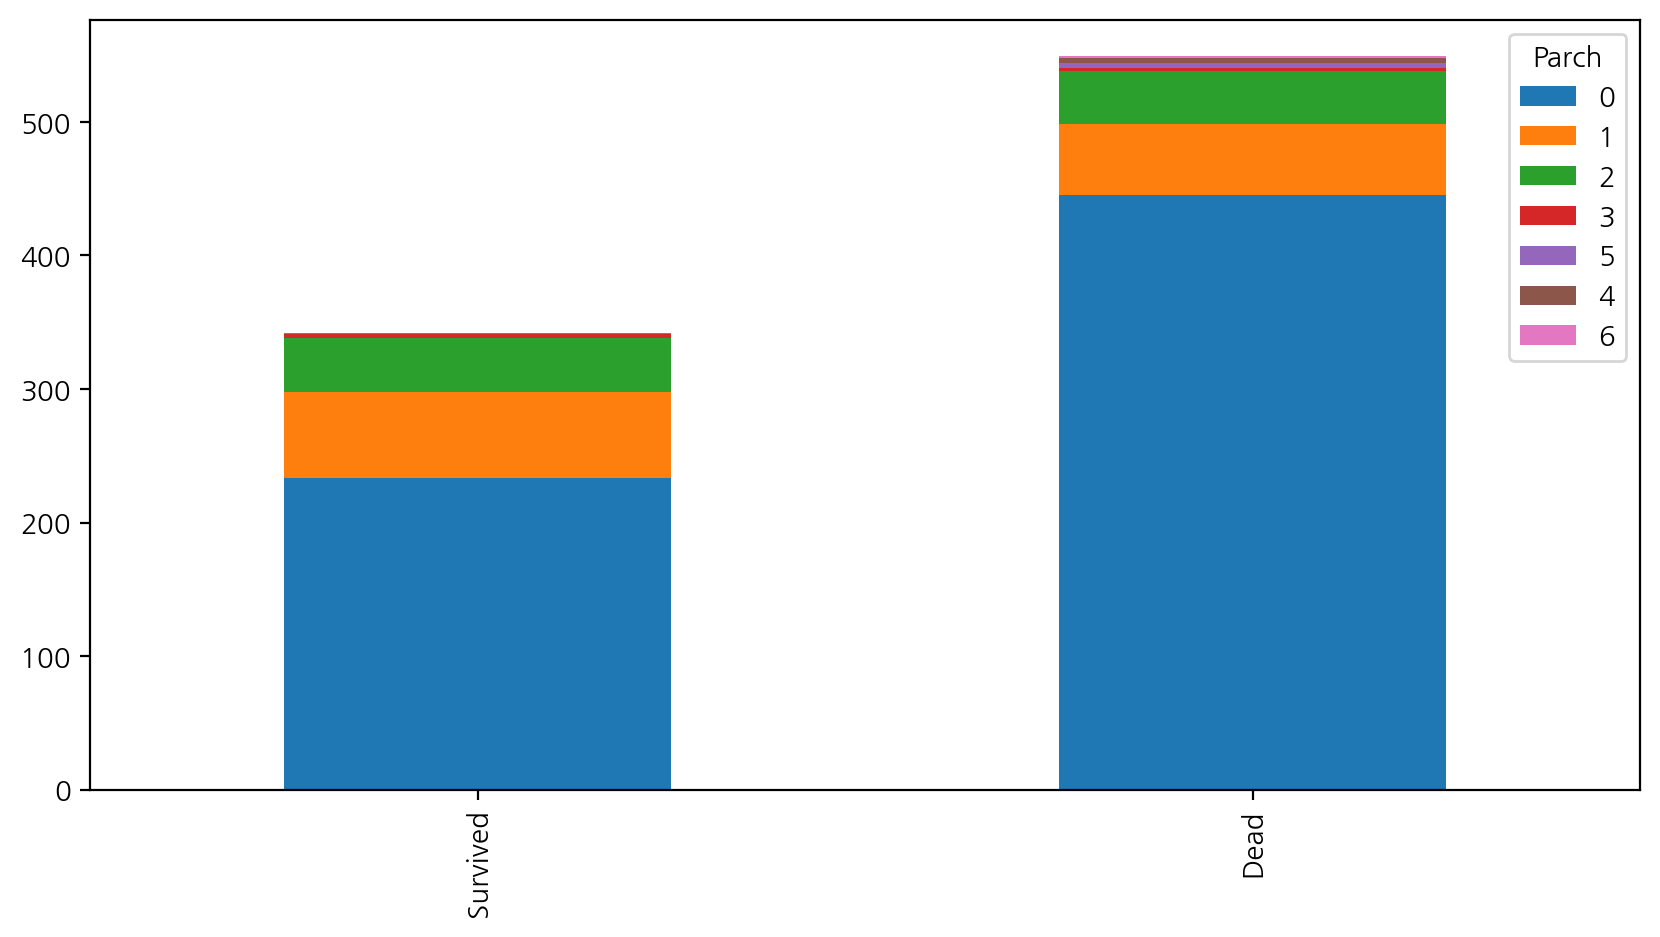

In [22]:
# 동행한 부모,자식수에 따른 생존자 시각화
bar_chart("Parch")

## 데이터 전처리

In [23]:
train.isnull().sum()    # age, cabin, embarked의 null값 처리 필요

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Agerange    177
dtype: int64

In [24]:
test = pd.read_csv("data/test.csv", index_col="PassengerId")
print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
train_and_test = [train, test]

In [26]:
# Name에서 호칭 추출
for dataset in train_and_test:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')
# 정규표현식(공백으로 시작하고 ,.으로 끝나는 문자열 추
train.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agerange,Title
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20대,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30대,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20대,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30대,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30대,Mr


In [27]:
# 호칭: 성별과 함께 확인
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [28]:
# master, miss, mr, mrs 제외한 나머지는 other로 묶기
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer',
                                                 'Lady','Major', 'Rev', 'Sir'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
    

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [29]:
# 학습을 위한 string 변환
for dataset in train_and_test:
    dataset['Title'] = dataset['Title'].astype(str)

In [30]:
# 성별 string 변환
for dataset in train_and_test:
    dataset['Sex'] = dataset['Sex'].astype(str)

In [31]:
# 선착장 결측값 유무 확인
train.Embarked.value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [32]:
# 결측값을 가장 비율이 큰 S값으로 대체
for dataset in train_and_test:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].astype(str)

## 모델 설계 & 학습